In [9]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [10]:
def get_data(glob_pattern, header=0, columns=None):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=header)
        if columns is not None:
            timings_data.columns = columns
        
        timings_data = timings_data.melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [11]:
data1k = get_data("saved_runs/20241211T102000/1k/??-*.timings.collected.csv")
data2k = get_data("saved_runs/20241211T102000/2k/??-*.timings.collected.csv")
data5k = get_data("saved_runs/20241211T102000/5k/??-*.timings.collected.csv")
data10k = get_data("saved_runs/20241211T102000/10k/??-*.timings.collected.csv")
data20k = get_data("saved_runs/20241211T102000/20k/??-*.timings.collected.csv")
data50k = get_data("saved_runs/20241211T102000/50k/??-*.timings.collected.csv")
data100k = get_data("saved_runs/20241211T102000/100k/??-*.timings.collected.csv")
data200k = get_data("saved_runs/20241211T102000/200k/??-*.timings.collected.csv")

In [12]:
data500k = get_data("saved_runs/20241210T113800/??-*.timings.collected.csv", header=None, columns=['Wall (s)', 'User (s)', 'Sys (s)'])

In [13]:
data500k = data500k[data500k.endpoint=='fuseki']

In [14]:
data1k["ntriples"] = 1000
data2k["ntriples"] = 2000
data5k["ntriples"] = 5000
data10k["ntriples"] = 10000
data20k["ntriples"] = 20000
data50k["ntriples"] = 50000
data100k["ntriples"] = 100000
data200k["ntriples"] = 200000
data500k["ntriples"] = 500000

In [15]:
data = pandas.concat([data1k, data2k, data5k, data10k, data20k, data50k, data100k, data200k])

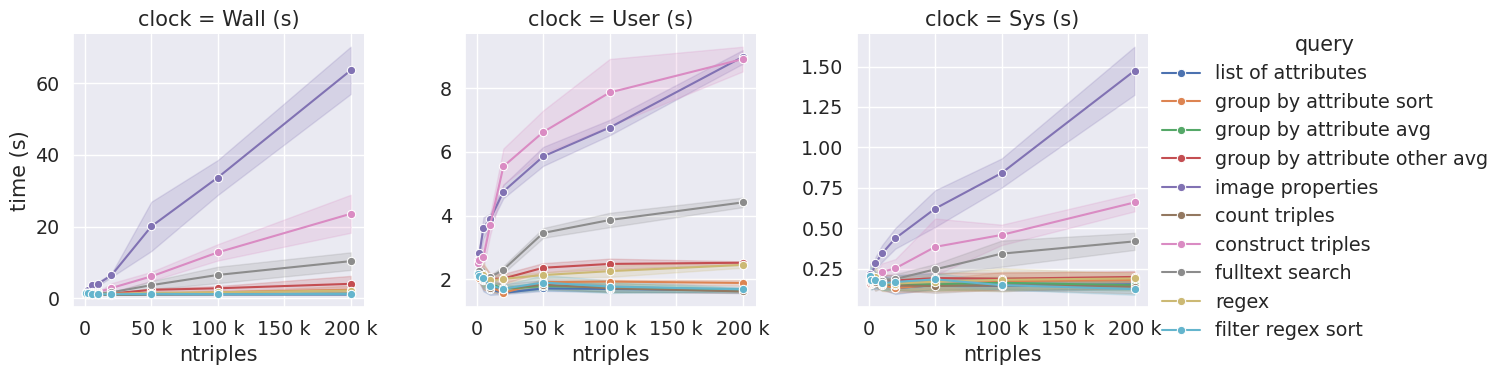

In [45]:
facetgrid = seaborn.FacetGrid(data=data, col='clock', hue='query', sharey=False, height=4,
                              hue_order=['list of attributes',
                                         'group by attribute sort',
                                         'group by attribute avg',
                                         'group by attribute other avg',
                                         'image properties',
                                         'count triples',
                                         'construct triples',
                                         'fulltext search',
                                         'regex',
                                         'filter regex sort', 
                                        ]
                             )
facetgrid.map_dataframe( seaborn.lineplot,
              data=data,
                    x='ntriples',
                    y='time (s)',
                    marker='o',
                    estimator='mean',
                    errorbar='sd',
                    )
facetgrid.add_legend()
seaborn.set(font_scale=1.25)

x_formatter = mpl.ticker.EngFormatter()
facetgrid.axes[0][0].xaxis.set_major_formatter(x_formatter)
facetgrid.savefig("saved_runs/20241211T102000/fuseki_clock_vs_ntriples_linear.png")



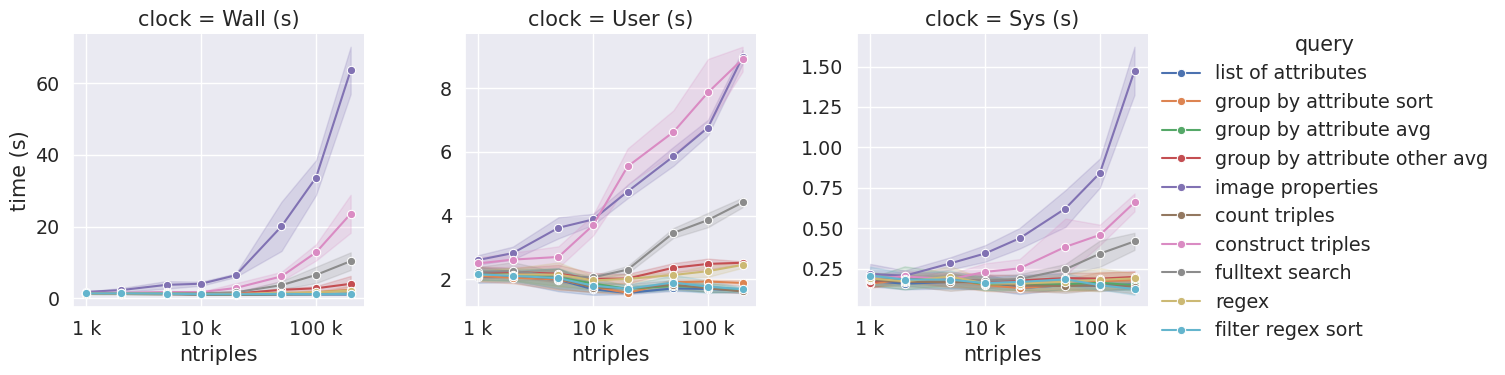

In [46]:
facetgrid = seaborn.FacetGrid(data=data, col='clock', hue='query', sharey=False, height=4,
                              hue_order=['list of attributes',
                                         'group by attribute sort',
                                         'group by attribute avg',
                                         'group by attribute other avg',
                                         'image properties',
                                         'count triples',
                                         'construct triples',
                                         'fulltext search',
                                         'regex',
                                         'filter regex sort', 
                                        ] )
facetgrid.map_dataframe( seaborn.lineplot,
              data=data,
                    x='ntriples',
                    y='time (s)',
                    marker='o',
                    estimator='mean',
                    errorbar='sd',
                    )
facetgrid.add_legend()
facetgrid.set(xscale='log')
seaborn.set(font_scale=1.25)
facetgrid.savefig("saved_runs/20241211T102000/fuseki_clock_vs_ntriples_log.png")

x_formatter = mpl.ticker.EngFormatter()
facetgrid.axes[0][0].xaxis.set_major_formatter(x_formatter)